# Representação

Exemplo de partida em arquivo pgn:

```
[Event "Wch U16"]
[Site "Wattignies"]
[Date "1976.08.27"]
[Round "?"]
[White "Chandler, Murray G"]
[Black "Kasparov, Gary"]
[Result "1-0"]
[WhiteElo ""]
[BlackElo ""]
[ECO "B22"]

1.e4 c5 2.c3 Nf6 3.e5 Nd5 4.d4 Nc6 5.Nf3 cxd4 6.cxd4 e6 7.a3 d6 8.Bd3 Qa5+
9.Bd2 Qb6 10.Nc3 Nxc3 11.Bxc3 dxe5 12.dxe5 Be7 13.O-O Bd7 14.Nd2 Qc7 15.Qg4 O-O-O
16.Rfc1 Kb8 17.Qc4 Rc8 18.b4 f6 19.Nf3 Qb6 20.Qe4 f5 21.Qe1 a6 22.Rab1 g5
23.Nd2 Nd4 24.Qe3 Rxc3 25.Rxc3 f4 26.Qe1 g4 27.Ne4 Bc6 28.Nc5 Ka7 29.a4 Bf3
30.a5 Qd8 31.Bc4 Bxc5 32.bxc5 Qh4 33.gxf3 gxf3 34.Kh1 Rg8 35.Qe4 Rg7 36.Qxd4 Qg5
37.c6+ Kb8 38.c7+ Rxc7 39.Rg1 Qh5 40.Rg8+ Rc8 41.Qd6+ Ka7  1-0

```

Quero aprender com o Kasparov, inicialmente a ideia é:

1. identificar a cor das peças do Kasparov
2. usar cada posição como feature e dar a jogada do kasparov como resposta

# Carregando PGN

In [5]:
import chess
import chess.pgn

pgn = open("games/Kasparov.pgn")

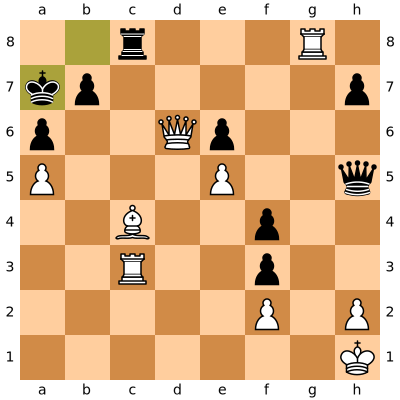

In [6]:
game1 = chess.pgn.read_game(pgn)

board = game1.board()
for m in game1.mainline_moves():
    board.push(m)

board

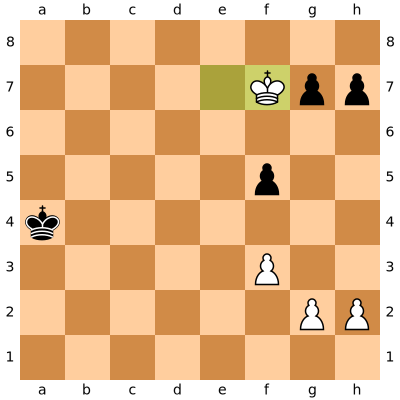

In [7]:
game2 = chess.pgn.read_game(pgn)

board = game2.board()
for m in game2.mainline_moves():
    board.push(m)

board

Então para iterar sobre os jogos basta chamar `read_game()` novamente.

# Encoding

In [16]:
game3 = chess.pgn.read_game(pgn)
board = game2.board()

s = str(board)
[i.split() for i in s.split('\n')]

[['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r'],
 ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
 ['R', 'N', 'B', 'Q', 'K', 'B', 'N', 'R']]

In [108]:
"""import itertools
list(itertools.chain.from_iterable( [i.split() for i in s.split('\n')] ))
"""

"import itertools\nlist(itertools.chain.from_iterable( [i.split() for i in s.split('\n')] ))\n"

In [107]:
"""
game3 = chess.pgn.read_game(pgn)
board = game3.board()
for m in game3.mainline_moves():
    
    move = chess.Move.from_uci(str(m))
    #if board.turn == True:
    #    print(board.turn)#, board.variation_san([m]))
    #print(board.turn, board.variation_san(m.uci))
    print( str(m.from_square).zfill(2), str(m.to_square).zfill(2), board.san(chess.Move(m.from_square, m.to_square)) )
    print(board.piece_at(m.from_square))
    board.push(m)

board
"""

'\ngame3 = chess.pgn.read_game(pgn)\nboard = game3.board()\nfor m in game3.mainline_moves():\n    \n    move = chess.Move.from_uci(str(m))\n    #if board.turn == True:\n    #    print(board.turn)#, board.variation_san([m]))\n    #print(board.turn, board.variation_san(m.uci))\n    print( str(m.from_square).zfill(2), str(m.to_square).zfill(2), board.san(chess.Move(m.from_square, m.to_square)) )\n    print(board.piece_at(m.from_square))\n    board.push(m)\n\nboard\n'

In [106]:
"""
board_test = chess.Board()
for i in iter(board_test.legal_moves):
    print(str(i.from_square).zfill(2),str(i.to_square).zfill(2))
board_test
"""

'\nboard_test = chess.Board()\nfor i in iter(board_test.legal_moves):\n    print(str(i.from_square).zfill(2),str(i.to_square).zfill(2))\nboard_test\n'

In [116]:
def symbol2value(list):
    d = {'p':-6,
         'r':-5, 
         'n':-4, 
         'b':-3, 
         'q':-2, 
         'k':-1,
         '.':0,
         'K':1,
         'Q':2,
         'B':3,
         'N':4,
         'R':5,
         'P':6}
    for i, v in enumerate(list):
        if v in d:
            list[i] = d[v]
    return list

game3 = chess.pgn.read_game(pgn)
board = game3.board()
for m in game3.mainline_moves():
    if board.turn == False:
        s = str(board)
        state = list(itertools.chain.from_iterable( [i.split() for i in s.split('\n')] ))
        target = [str(board.piece_at(m.from_square)), m.from_square, m.to_square]
        
        print(symbol2value(state+target))
        
    board.push(m)
    

[-5, -4, -3, -2, -1, -3, -4, -5, -6, -6, -6, -6, -6, -6, -6, -6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 6, 6, 6, 5, 4, 3, 2, 1, 3, 4, 5, -6, 50, 42]
[-5, -4, -3, -2, -1, -3, -4, -5, -6, -6, 0, -6, -6, -6, -6, -6, 0, 0, -6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 0, 0, 6, 6, 6, 5, 4, 3, 2, 1, 3, 4, 5, -6, 51, 35]
[-5, -4, -3, -2, -1, -3, -4, -5, -6, -6, 0, 0, -6, -6, -6, -6, 0, 0, -6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 0, 0, 6, 6, 6, 5, 4, 3, 2, 1, 3, 4, 5, -6, 42, 35]
[-5, -4, -3, -2, -1, -3, -4, -5, -6, -6, 0, 0, -6, -6, -6, -6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 6, 6, 5, 4, 3, 2, 1, 3, 4, 5, -4, 62, 45]
[-5, -4, -3, -2, -1, -3, 0, -5, -6, -6, 0, 0, -6, -6, -6, -6, 0, 0, 0, 0, 0, -4, 0, 0, 0, 0, 0, -6, 0, 0, 0, 0, 0, 0, 

In [130]:
pgn = open("games/Kasparov.pgn")
games = list()
while len(games) < 2000:
    try:
        games.append(chess.pgn.read_game(pgn))
    except UnicodeDecodeError:
        False

print(len(games))

2000


In [145]:
g = games[-1]
#'Kasparov' in g.headers['White'] or 'Garry' in g.headers['White']
print(g)

[Event "ChessFriends Simul"]
[Site "Bratislava SVK"]
[Date "2011.10.14"]
[Round "1"]
[White "Kasparov,G"]
[Black "Kocisky,Eduard"]
[Result "1-0"]
[BlackElo ""]
[ECO "A45"]
[WhiteElo "2812"]

1. d4 Nf6 2. Bg5 d5 3. e3 Bf5 4. Bxf6 gxf6 5. Bd3 Bg6 6. c4 e6 7. Nc3 Be7 8. cxd5 exd5 9. Nge2 c6 10. h4 Nd7 11. h5 Bxd3 12. Qxd3 Nb6 13. b3 Qc7 14. Qf5 Qd7 15. Ng3 Qxf5 16. Nxf5 Bf8 17. Ke2 h6 18. g4 Kd7 19. f4 Rg8 20. Kf3 Re8 21. Rac1 Nc8 22. e4 Ne7 23. Ne3 dxe4+ 24. Nxe4 Nd5 25. Nxd5 cxd5 26. Nxf6+ 1-0


In [141]:
import pandas as pd
import numpy as np
import itertools

In [139]:
df = pd.DataFrame(columns=[str(i) for i in range(67)])

In [459]:
def symbol2value(list):
    d = {'p':-6,
         'r':-5, 
         'n':-4, 
         'b':-3, 
         'q':-2, 
         'k':-1,
         '.':0,
         'K':1,
         'Q':2,
         'B':3,
         'N':4,
         'R':5,
         'P':6}
    for i, v in enumerate(list):
        if v in d:
            list[i] = d[v]
    return list

    
def game2list(g):
    matrix = list()
    board = g.board()
    for m in game3.mainline_moves():
        if board.turn == False:
            s = str(board)
            state = list(itertools.chain.from_iterable( [i.split() for i in s.split('\n')] ))
            target = [str(board.piece_at(m.from_square)), m.from_square, m.to_square]
            matrix.append(symbol2value(state+target))
        board.push(m)
    return matrix
            

In [183]:
jogos = [i for i in games if 'Kasparov' in i.headers['Black'] or 'Garry' in i.headers['Black']]

In [451]:
print(jogos[62])

[Event "URS-ch49"]
[Site "Frunze"]
[Date "1981.??.??"]
[Round "?"]
[White "Psakhis, Lev"]
[Black "Kasparov, Gary"]
[Result "1-0"]
[BlackElo "2630"]
[ECO "E55"]
[WhiteElo "2535"]

1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. e3 c5 5. Nf3 O-O 6. Bd3 d5 7. O-O dxc4 8. Bxc4 Nbd7 9. Qe2 a6 10. a3 Ba5 11. Ba2 cxd4 12. exd4 Bxc3 13. bxc3 b5 14. a4 Bb7 15. Bd2 Ne4 16. Rfc1 Nd6 17. Bf4 Nf6 18. Nd2 Nf5 19. axb5 Nd5 20. Bg3 axb5 21. Qxb5 Nxc3 22. Rxc3 Nxd4 23. Qd3 Ra4 24. Nc4 Qd5 25. f3 Rfa8 26. Rd1 Rd8 27. Bb1 Nxf3+ 28. gxf3 Qc5+ 29. Ne3 Qxe3+ 30. Qxe3 Rxd1+ 31. Kg2 Rxb1 32. Rb3 Rb4 33. Rxb4 Rxb4 34. Qd2 Bxf3+ 35. Kxf3 Rb3+ 36. Kg2 h6 37. Qc2 Rb5 38. Kf3 Rf5+ 39. Kg2 h5 40. h4 g5 41. hxg5 Rxg5 42. Kh3 Rf5 43. Qc8+ Kh7 44. Qd7 1-0


[-5, -4, -3, -2, -1, -3, -4, -5, -6, -6, -6, -6, -6, -6, -6, -6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 6, 6, 6, 5, 4, 3, 2, 1, 3, 4, 5, -6, 50, 42]


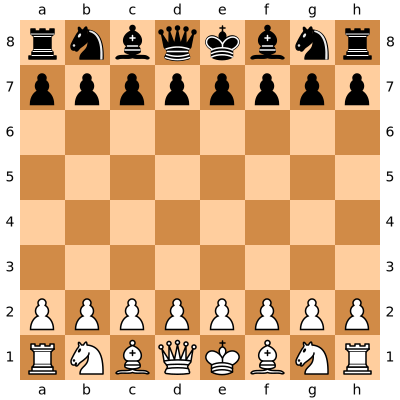

In [464]:
print(game2list(jogos[152])[0])
jogos[152].board()

In [184]:
blackgames = [ ]
for j in jogos:
    blackgames += game2list(j)

In [185]:
len(blackgames)

17500

In [186]:
for i, v in enumerate(blackgames):
    df.loc[i] = v
df[['64','65', '66']]

,64,65,66
0,-6,50,42
1,-6,51,35
2,-6,42,35
3,-4,62,45
4,-6,52,44
5,-3,61,52
6,-4,45,35
7,-1,60,62
8,-4,57,42
9,-6,53,37


In [398]:
X_train = df.drop(['64','65', '66'], axis=1)
y_train = df[['64','65', '66']]
X_test  = df.drop(['64','65', '66'], axis=1)

In [421]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed
from tensorflow import set_random_seed

def create_model(lyrs=[15], act='exponential', opt='Adam', dr=0.1):
    seed(824)
    set_random_seed(824)
    model = Sequential()
    
    # first layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    # hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    model.add(Dropout(dr))
        
    model.add(Dense(3, activation='relu'))  # output layer
    
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
    
    return model

In [422]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 15)                975       
_________________________________________________________________
dropout_13 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 48        
Total params: 1,023
Trainable params: 1,023
Non-trainable params: 0
_________________________________________________________________
None


In [423]:
training = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3, verbose=0)
val_acc = np.mean(training.history['val_acc'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))


val_acc: 93.30%


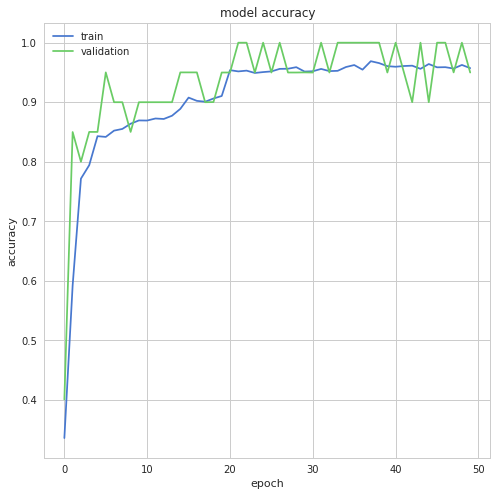

In [424]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (8,8)})

plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [224]:
test = model.predict(X_test)
test.round()

array([[ 0., 48., 41.],
       [ 0., 48., 35.],
       [ 0., 41., 34.],
       ...,
       [ 0., 34., 20.],
       [ 0., 50., 43.],
       [ 0., 46., 58.]], dtype=float32)

In [259]:
t = X_test.sample(1)
print(t, model.predict(t).round())

       0  1  2  3  4  5  6  7  8  9 ...  54  55  56  57  58  59  60  61  62  \
15699 -5  0  0 -2  0 -5  0 -1 -6  0 ...   6   0   5   0   3   0   5   0   1   

       63  
15699   0  

[1 rows x 64 columns] [[ 0. 46. 58.]]


In [250]:
type(t)
t.values.tolist();

[[-5,
  -4,
  -3,
  -2,
  -1,
  -3,
  0,
  -5,
  -6,
  -6,
  0,
  0,
  0,
  -6,
  -6,
  -6,
  0,
  0,
  0,
  0,
  -6,
  -4,
  0,
  0,
  0,
  0,
  0,
  -6,
  0,
  0,
  0,
  0,
  0,
  0,
  6,
  6,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  4,
  0,
  0,
  6,
  6,
  0,
  0,
  0,
  6,
  6,
  6,
  5,
  0,
  3,
  2,
  1,
  3,
  0,
  5]]

In [260]:
t = X_test.sample(1)

def list2value(list):
    d = {-6:(chess.PAWN, chess.BLACK),
         -5:(chess.ROOK, chess.BLACK), 
         -4:(chess.KNIGHT, chess.BLACK), 
         -3:(chess.BISHOP, chess.BLACK), 
         -2:(chess.QUEEN, chess.BLACK), 
         -1:(chess.KING, chess.BLACK),
          0:'.',
         1:(chess.KING, chess.WHITE),
         2:(chess.QUEEN, chess.WHITE),
         3:(chess.BISHOP, chess.WHITE),
         4:(chess.KNIGHT, chess.WHITE),
         5:(chess.ROOK, chess.WHITE),
         6:(chess.PAWN, chess.WHITE)}
    for i, v in enumerate(list):
        if v in d:
            list[i] = d[v]
    return list

k = list2value(t.values.tolist()[0])
k;

------------------------------------------
      0  1  2  3  4  5  6  7  8  9 ...  54  55  56  57  58  59  60  61  62  63
4264 -5 -4 -3 -2 -1 -3  0 -5 -6 -6 ...   6   6   5   0   3   2   1   3   4   5

[1 rows x 64 columns] [[ 0. 51. 44.]]


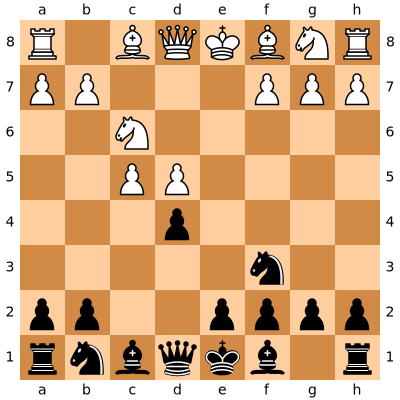

In [261]:
boardboard = chess.Board()
boardboard.clear_board()

for i,v in enumerate(k):
    if v != '.':
        boardboard.set_piece_at(i, chess.Piece(v[0], v[1]))

print('------------------------------------------')
print(t, model.predict(t).round())
boardboard

In [263]:
model.predict(t).round().tolist()

[[0.0, 51.0, 44.0]]

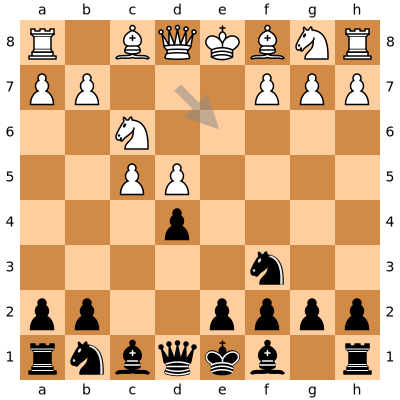

In [281]:
import chess.svg

def pred(list):
    return chess.svg.Arrow(tail=int(list[1]), head=int(list[2]))
a = pred(model.predict(t).round().tolist()[0])
#boardboard.arrows = a
chess.svg.board(board=boardboard, arrows=[a], size=400)

[(4, False), (2, False), (3, False), (5, False), (6, False), (3, False), '.', (4, False), (1, False), (1, False), '.', '.', '.', (1, False), (1, False), (1, False), '.', '.', '.', '.', (1, False), (2, False), '.', '.', '.', '.', '.', (1, False), '.', '.', '.', '.', '.', '.', (1, True), (1, True), '.', '.', '.', '.', '.', '.', (2, True), '.', '.', (2, True), '.', '.', (1, True), (1, True), '.', '.', '.', (1, True), (1, True), (1, True), (4, True), '.', (3, True), (5, True), (6, True), (3, True), '.', (4, True)]
[[ 0.       61.295677 52.02069 ]]


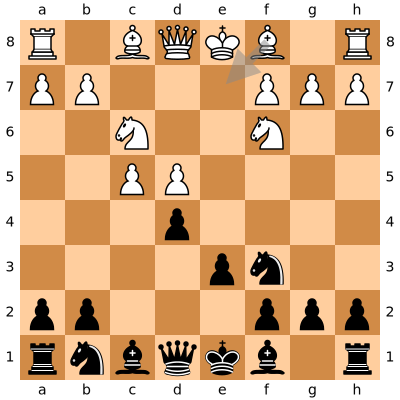

In [467]:
t = X_test.sample(1)

def list2value(list):
    d = {-6:(chess.PAWN, chess.BLACK),
         -5:(chess.ROOK, chess.BLACK), 
         -4:(chess.KNIGHT, chess.BLACK), 
         -3:(chess.BISHOP, chess.BLACK), 
         -2:(chess.QUEEN, chess.BLACK), 
         -1:(chess.KING, chess.BLACK),
          0:'.',
         1:(chess.KING, chess.WHITE),
         2:(chess.QUEEN, chess.WHITE),
         3:(chess.BISHOP, chess.WHITE),
         4:(chess.KNIGHT, chess.WHITE),
         5:(chess.ROOK, chess.WHITE),
         6:(chess.PAWN, chess.WHITE)}
    for i, v in enumerate(list):
        if v in d:
            list[i] = d[v]
    return list

def pred(list):
    return chess.svg.Arrow(tail=int(list[1]), head=int(list[2]))


k = list2value(t.values.tolist()[0])
print(k)
boardboard = chess.Board()
boardboard.clear_board()

for i,v in enumerate(k):
    if v != '.':
        boardboard.set_piece_at(i, chess.Piece(v[0], v[1]))
        
a = pred(model.predict(t).round().tolist()[0])
#boardboard.arrows = a
print(model.predict(t))
chess.svg.board(board=boardboard, arrows=[a], size=400)

# Referências

- [Download PGN Files](http://www.pgnmentor.com/files.html#players)

In [301]:
bla = chess.Board()
bla.turn

True

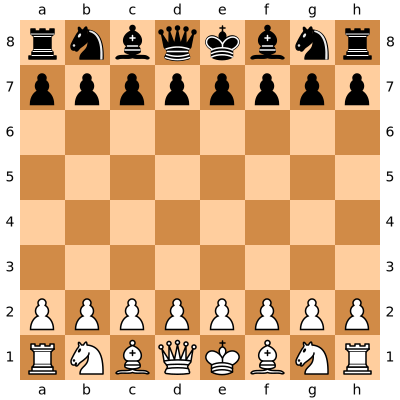

In [448]:
bla